In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [191]:
df=pd.read_csv('/content/bank_marketing_updated_v1.csv',skiprows=2)

In [192]:
df.shape

(45211, 19)

In [193]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [194]:
df.columns

Index(['customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
       'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [196]:
# splitting the column jobedu into two variable Job and Education column
df['Job']=df['jobedu'].apply(lambda x:x.split(",")[0])
df['Education']=df['jobedu'].apply(lambda x:x.split(",")[1])
df.drop(columns='jobedu',inplace=True)

In [197]:
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,Education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [198]:
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
Job            0
Education      0
dtype: int64

In [199]:
# Treating nullvalues in column age
df['age'].fillna(0,inplace=True)
b=df['age'].mean()

In [200]:
df['age'].replace(0,b,inplace=True)
df['age'].isnull().sum()

0

In [201]:
# changing datatype of age into int
df['age']=df['age'].astype('int')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   salary      45211 non-null  int64 
 3   balance     45211 non-null  int64 
 4   marital     45211 non-null  object
 5   targeted    45211 non-null  object
 6   default     45211 non-null  object
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45161 non-null  object
 12  duration    45211 non-null  object
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  response    45181 non-null  object
 18  Job         45211 non-null  object
 19  Education   45211 non-null  object
dtypes: int

In [203]:
# filling the missing values in column month
c=df['month'].mode()[0]

In [204]:
df['month'].replace(np.nan,c,inplace=True)
df['month'].isnull().sum()

0

In [205]:
# splitting the column month into two variable Month and Year column
df['Month']=df['month'].apply(lambda x:x.split(",")[0])
df['Year']=df['month'].apply(lambda x:x.split(",")[1])
df.drop(columns='month',inplace=True)
df.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,response,Job,Education,Month,Year
0,1,58,100000,2143,married,yes,no,yes,no,unknown,5,261 sec,1,-1,0,unknown,no,management,tertiary,may,2017
1,2,44,60000,29,single,yes,no,yes,no,unknown,5,151 sec,1,-1,0,unknown,no,technician,secondary,may,2017
2,3,33,120000,2,married,yes,no,yes,yes,unknown,5,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,may,2017
3,4,47,20000,1506,married,no,no,yes,no,unknown,5,92 sec,1,-1,0,unknown,no,blue-collar,unknown,may,2017
4,5,33,0,1,single,no,no,no,no,unknown,5,198 sec,1,-1,0,unknown,no,unknown,unknown,may,2017


In [206]:
# filling missing values in the column response
d=df['response'].mode()[0]
df['response'].replace(np.nan,d,inplace=True)
df['response'].isnull().sum()

0

In [ ]:
# EDA

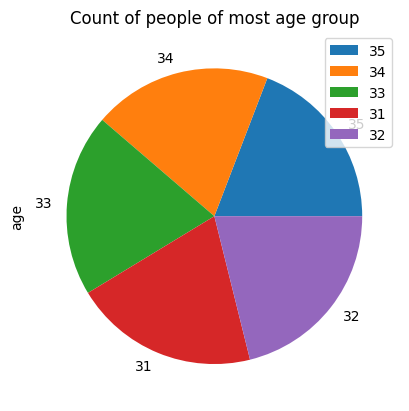

In [ ]:
# age observation for top most age range
df['age'].value_counts().head(5).sort_values().plot(kind='pie',title='Count of people of most age group')
plt.legend(loc='best')

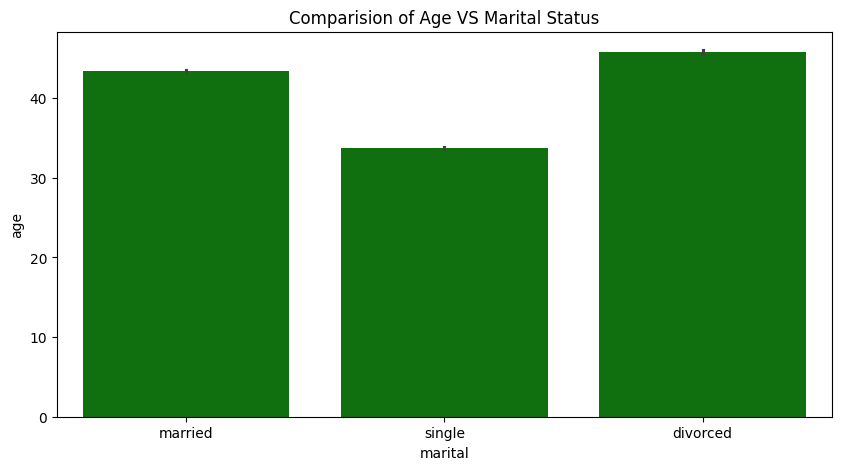

In [ ]:
# Martial status comparision wth Agegroup
plt.figure(figsize=(10,5))
sns.barplot(x='marital',y='age',color='g',data=df)
plt.title('Comparision of Age VS Marital Status')
plt.show()

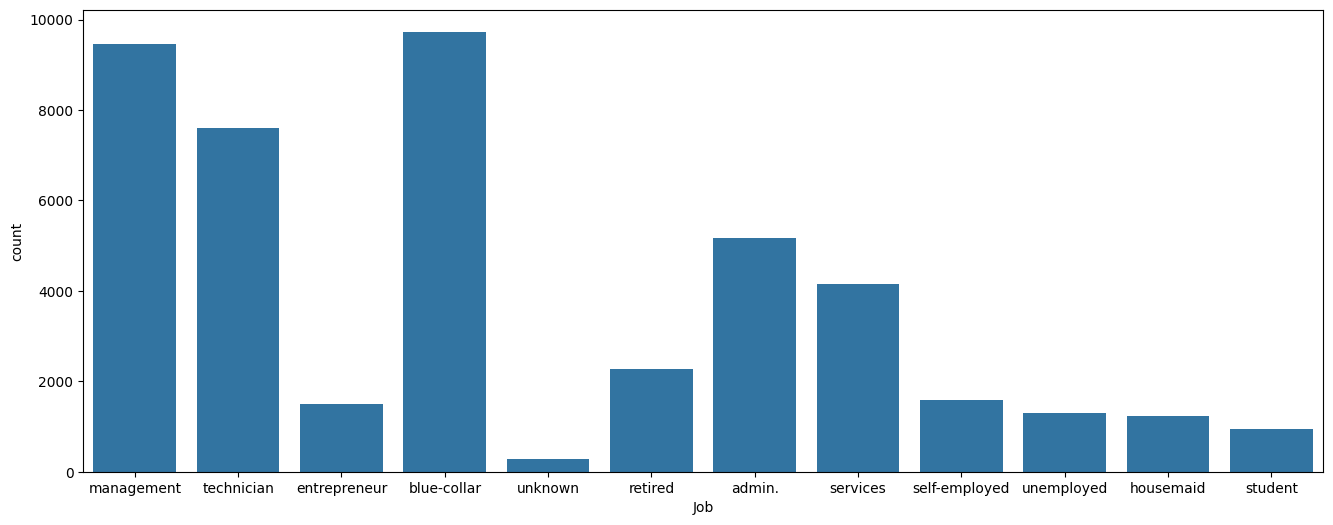

In [ ]:
# graph of peple employed in different profession
plt.figure(figsize=(16,6))
sns.countplot(x='Job',data=df)
plt.show()

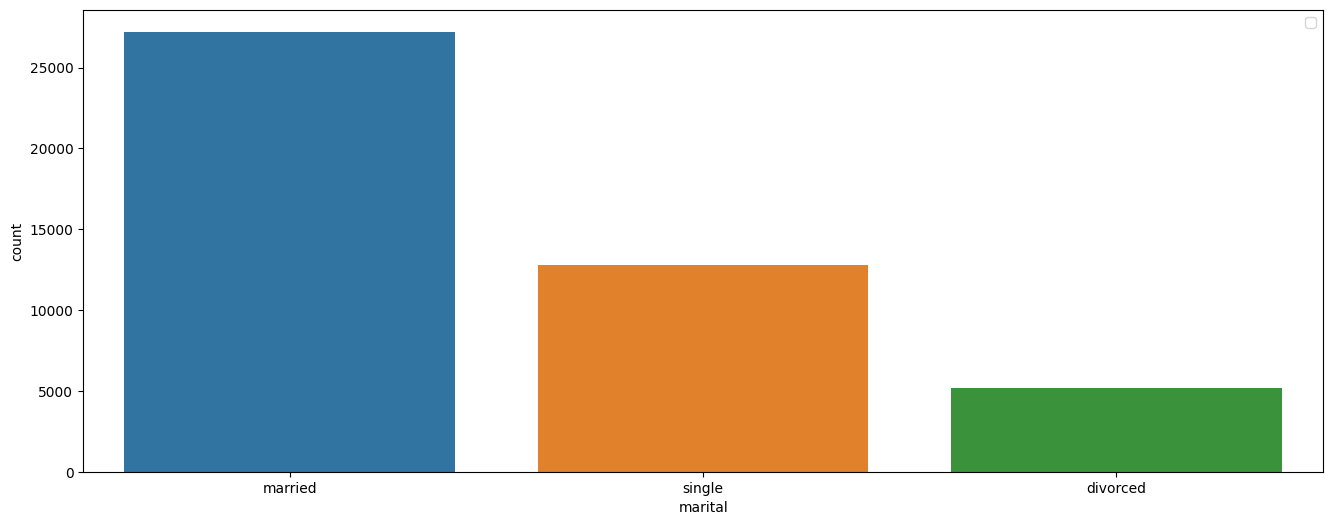

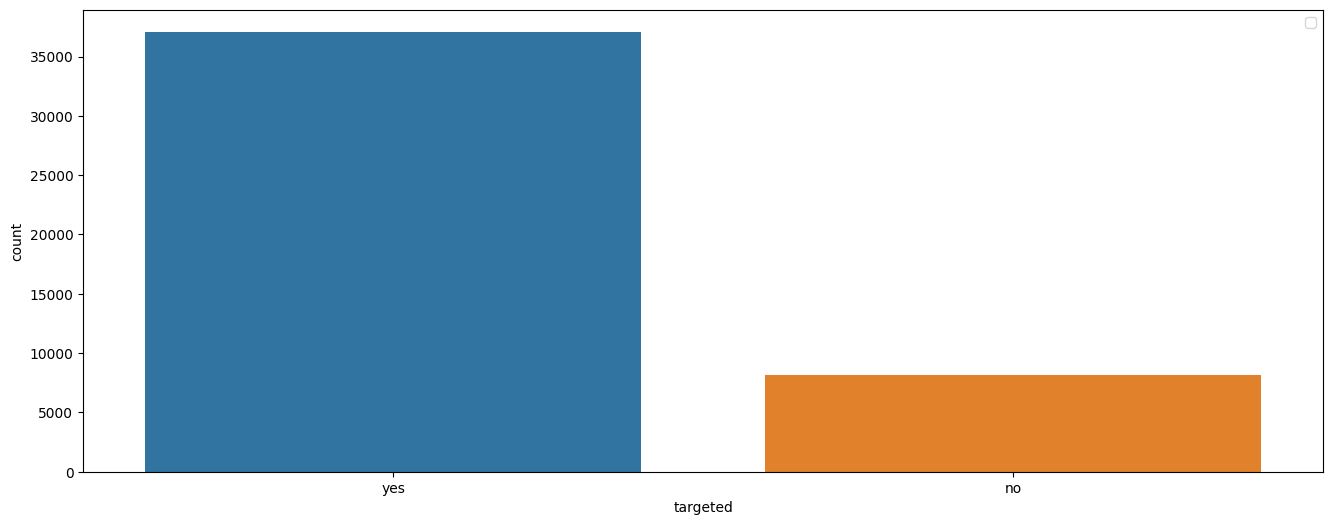

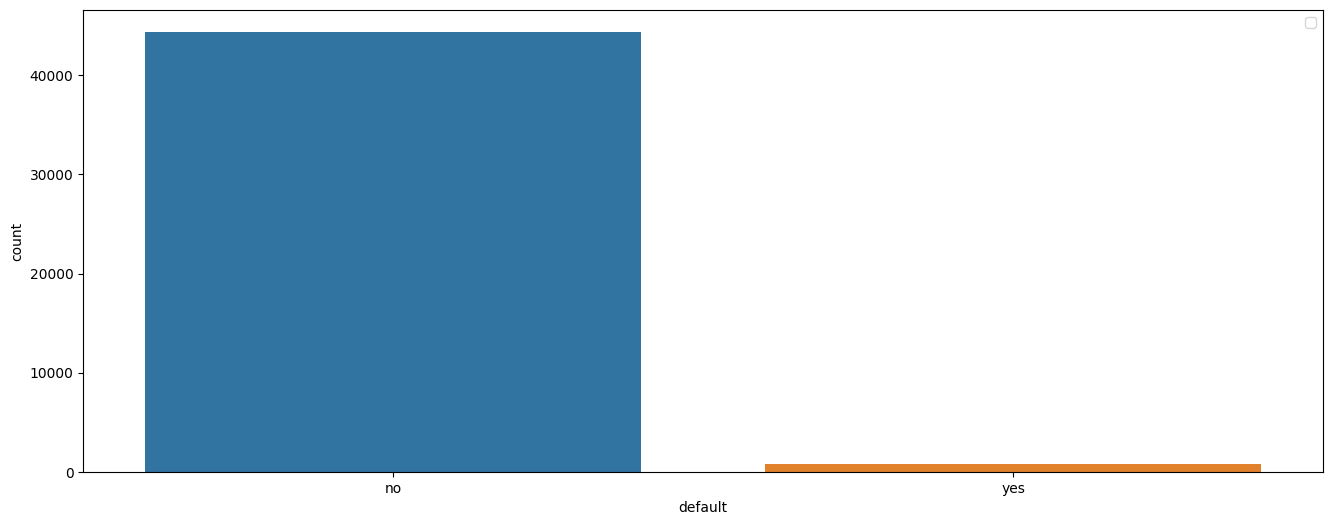

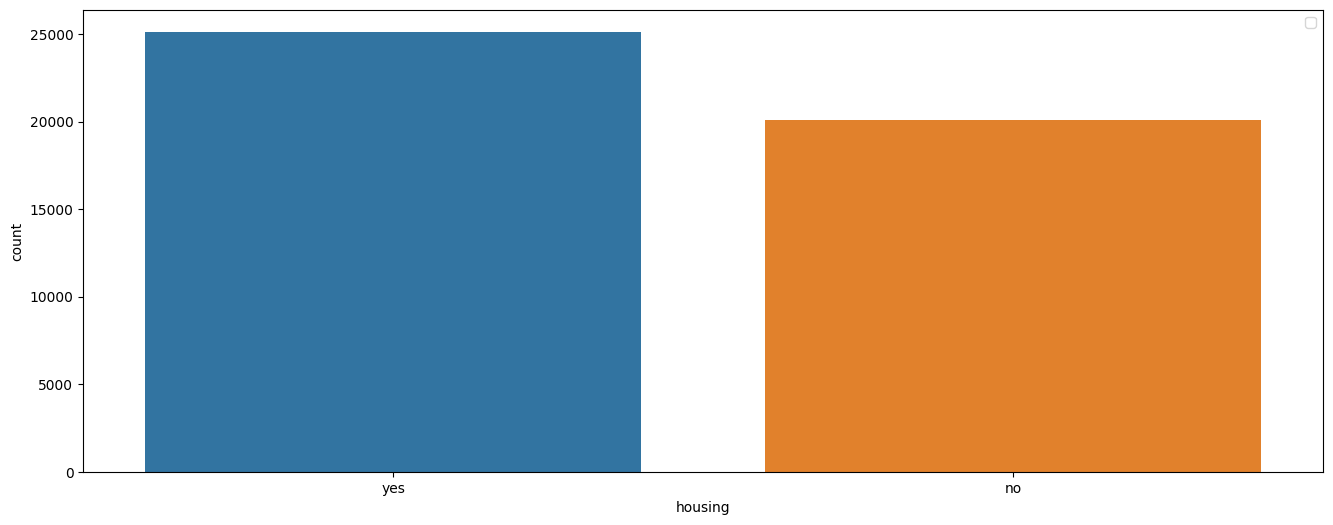

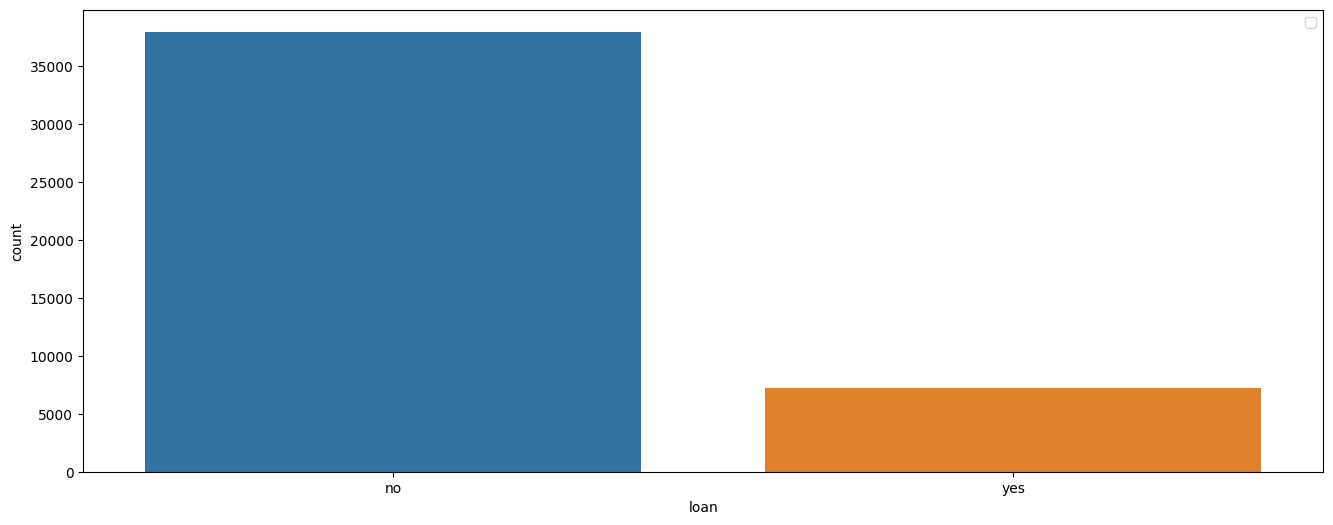

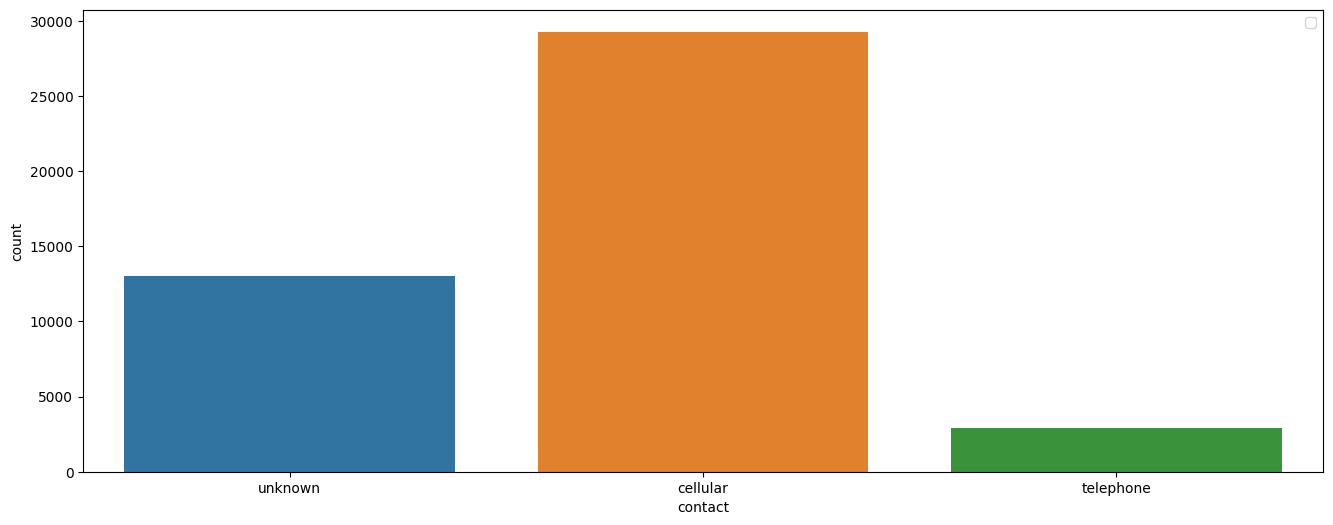

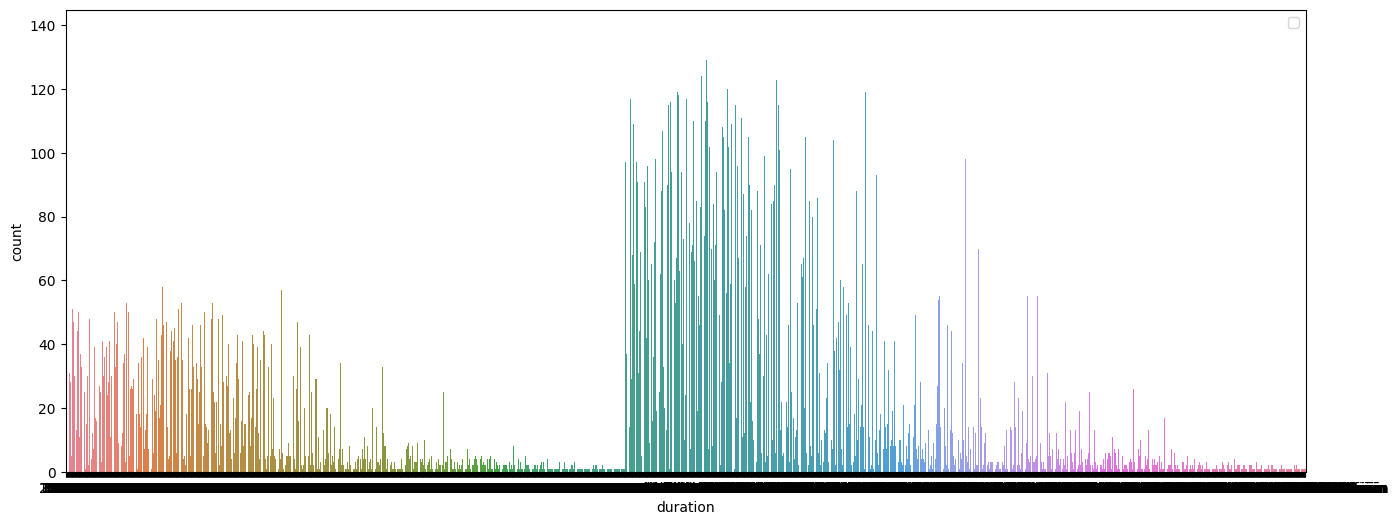

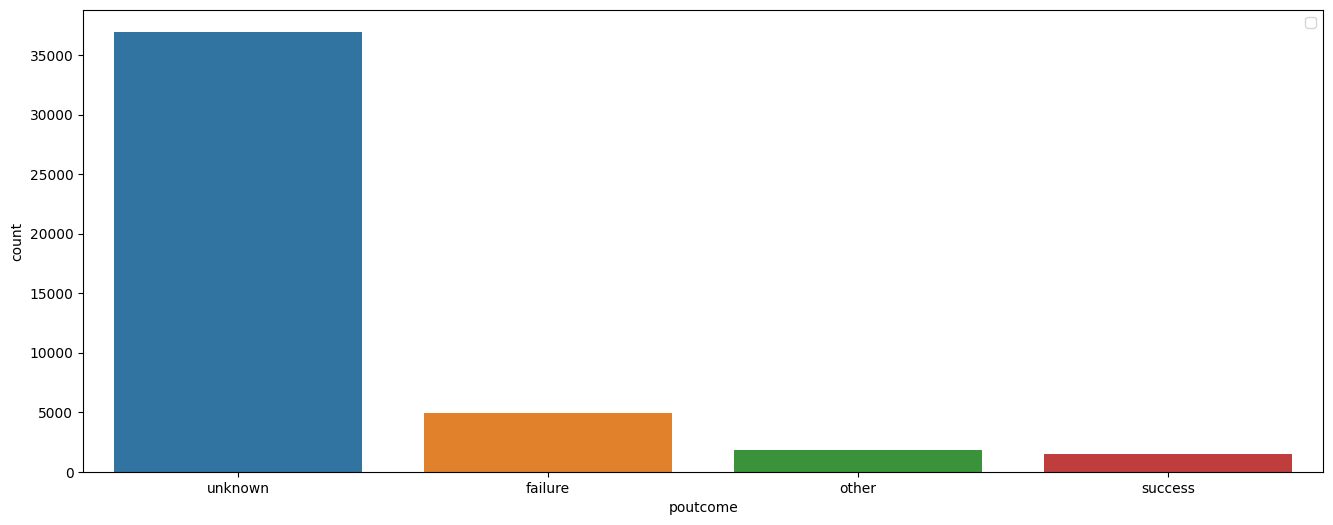

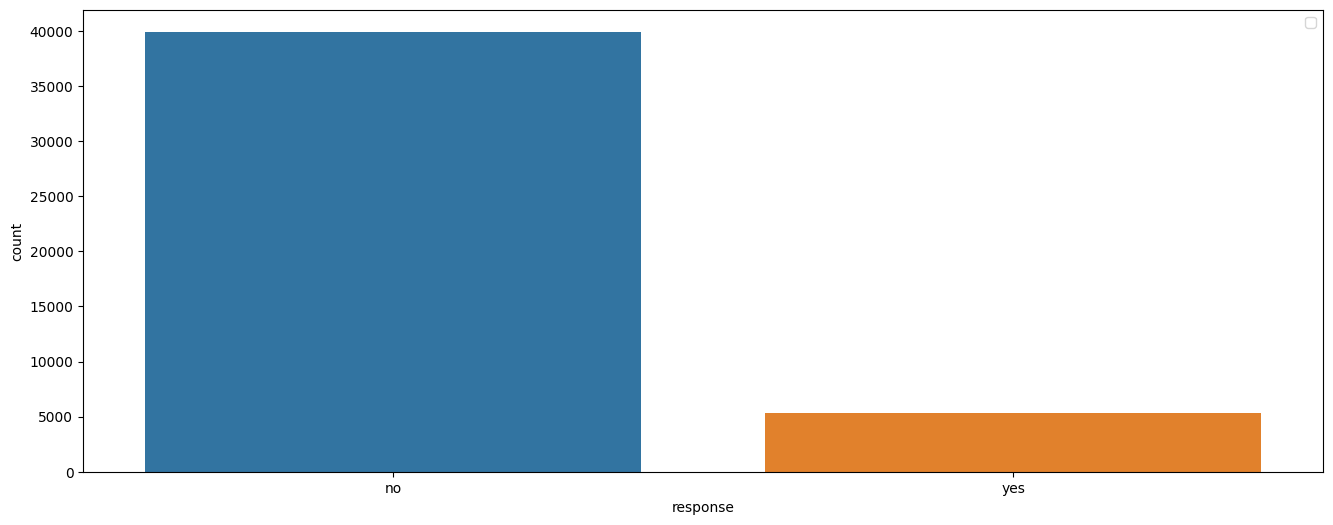

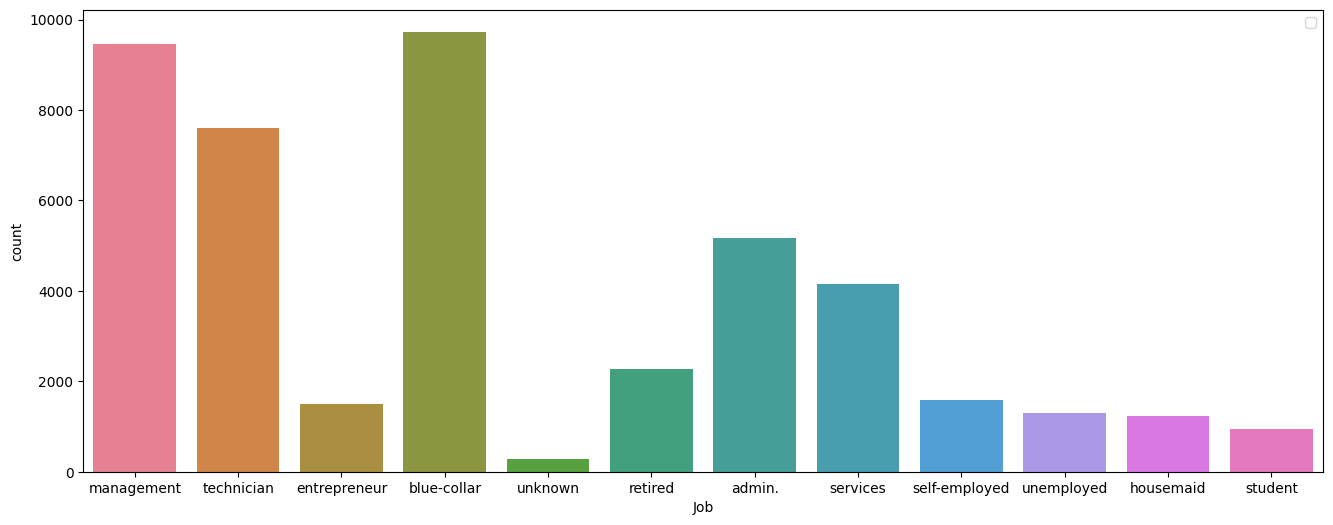

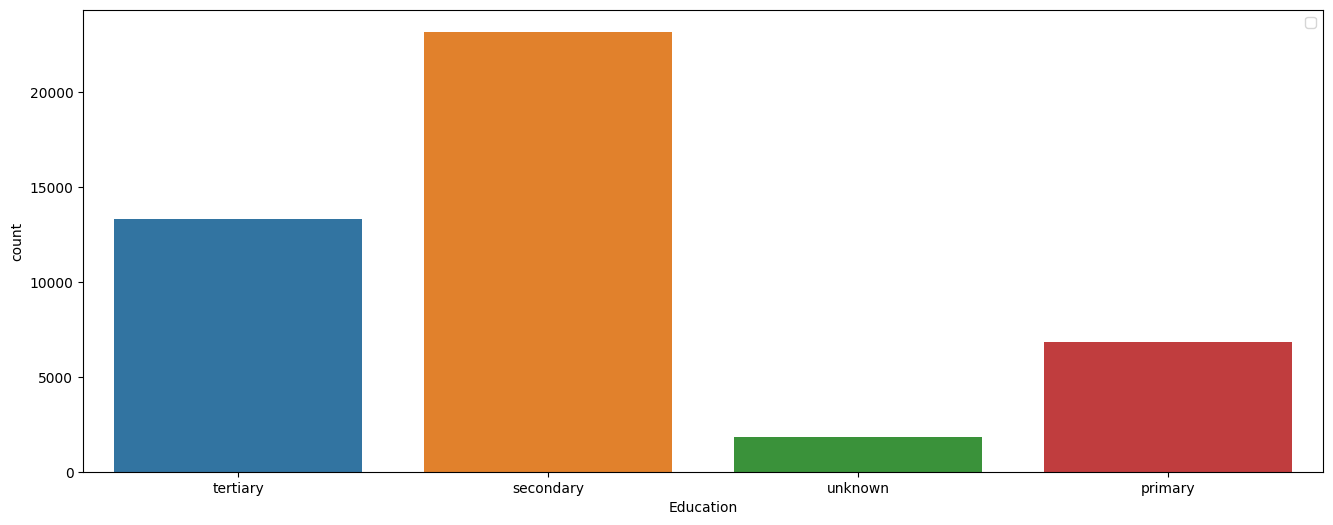

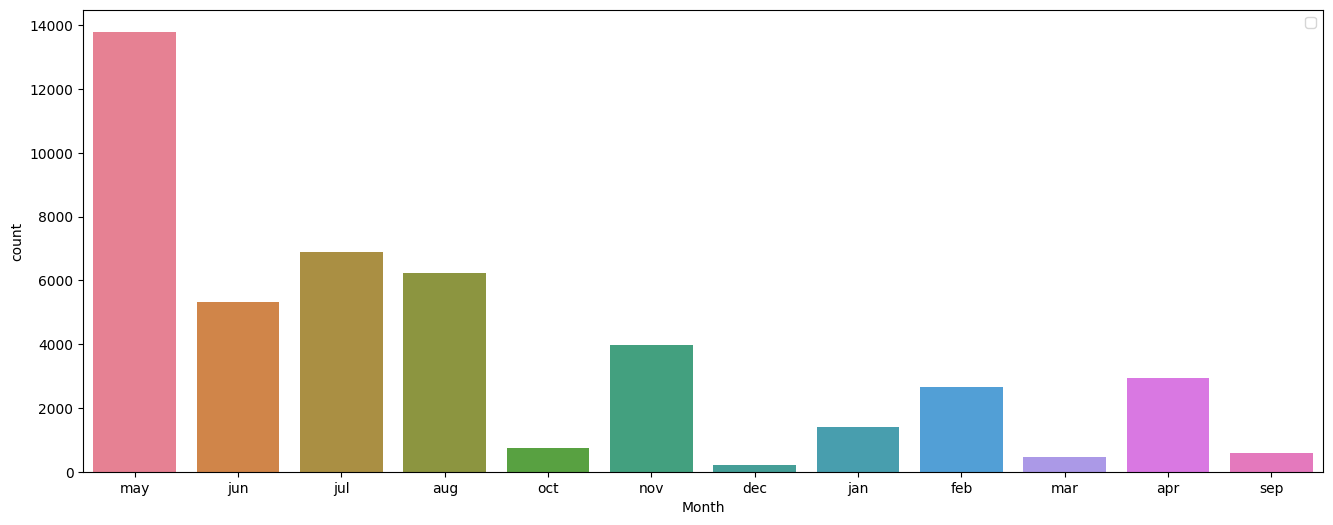

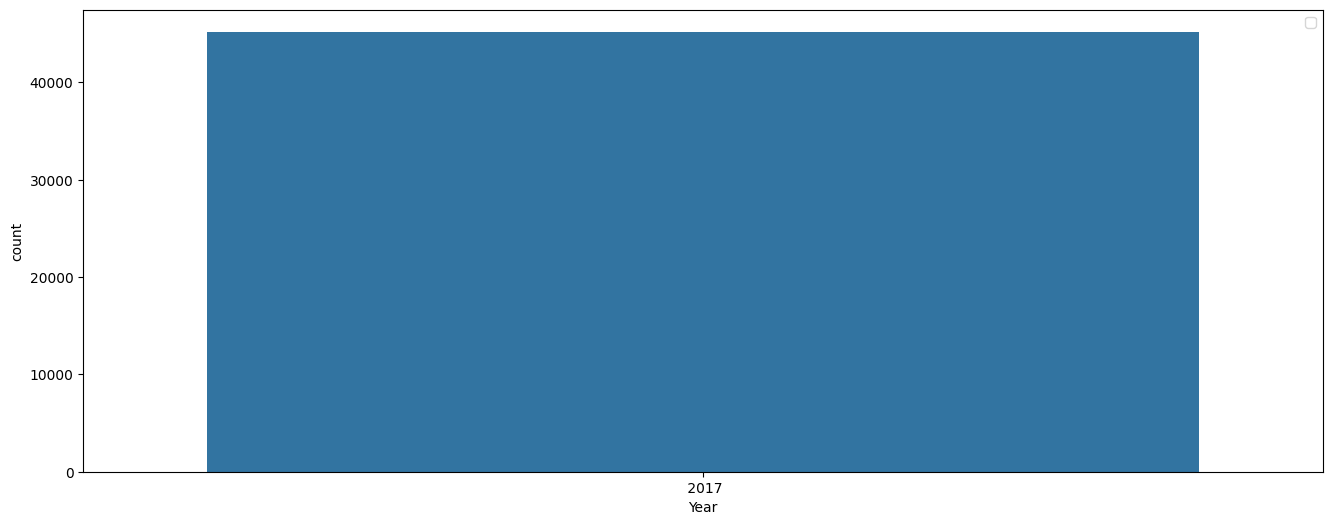

In [ ]:
ob=df.select_dtypes(object)
for i in ob:
  plt.figure(figsize=(16,6))
  ax=sns.countplot(x=i, hue=i,data=df)
  ax.legend(loc='best')

<Figure size 1000x600 with 0 Axes>

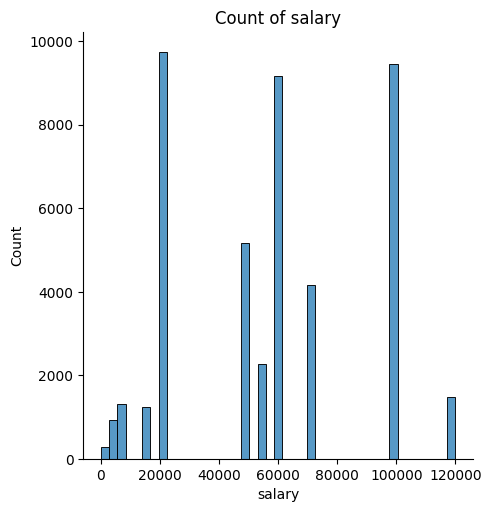

In [ ]:
# Salary observation
plt.figure(figsize=(10,6))
sns.displot(df['salary'])
plt.title('Count of salary')
plt.show()

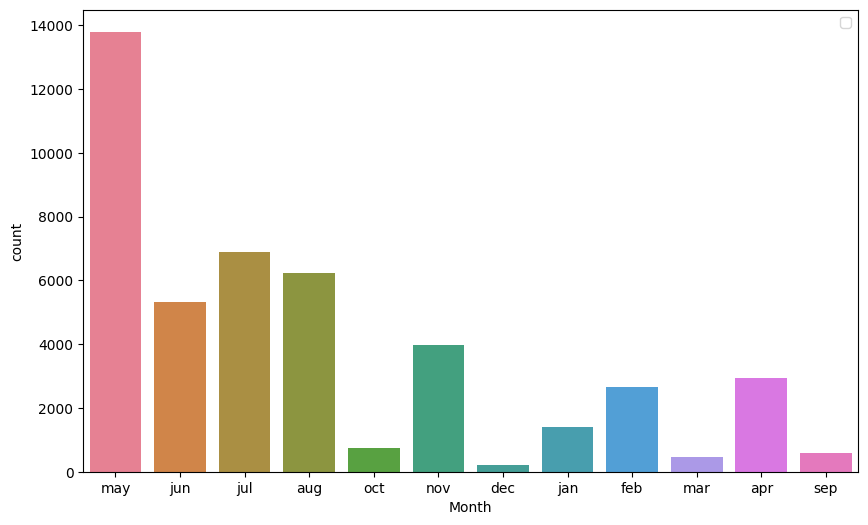

In [ ]:
# Month count
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Month',data=df,hue='Month')
ax.legend(loc='best')

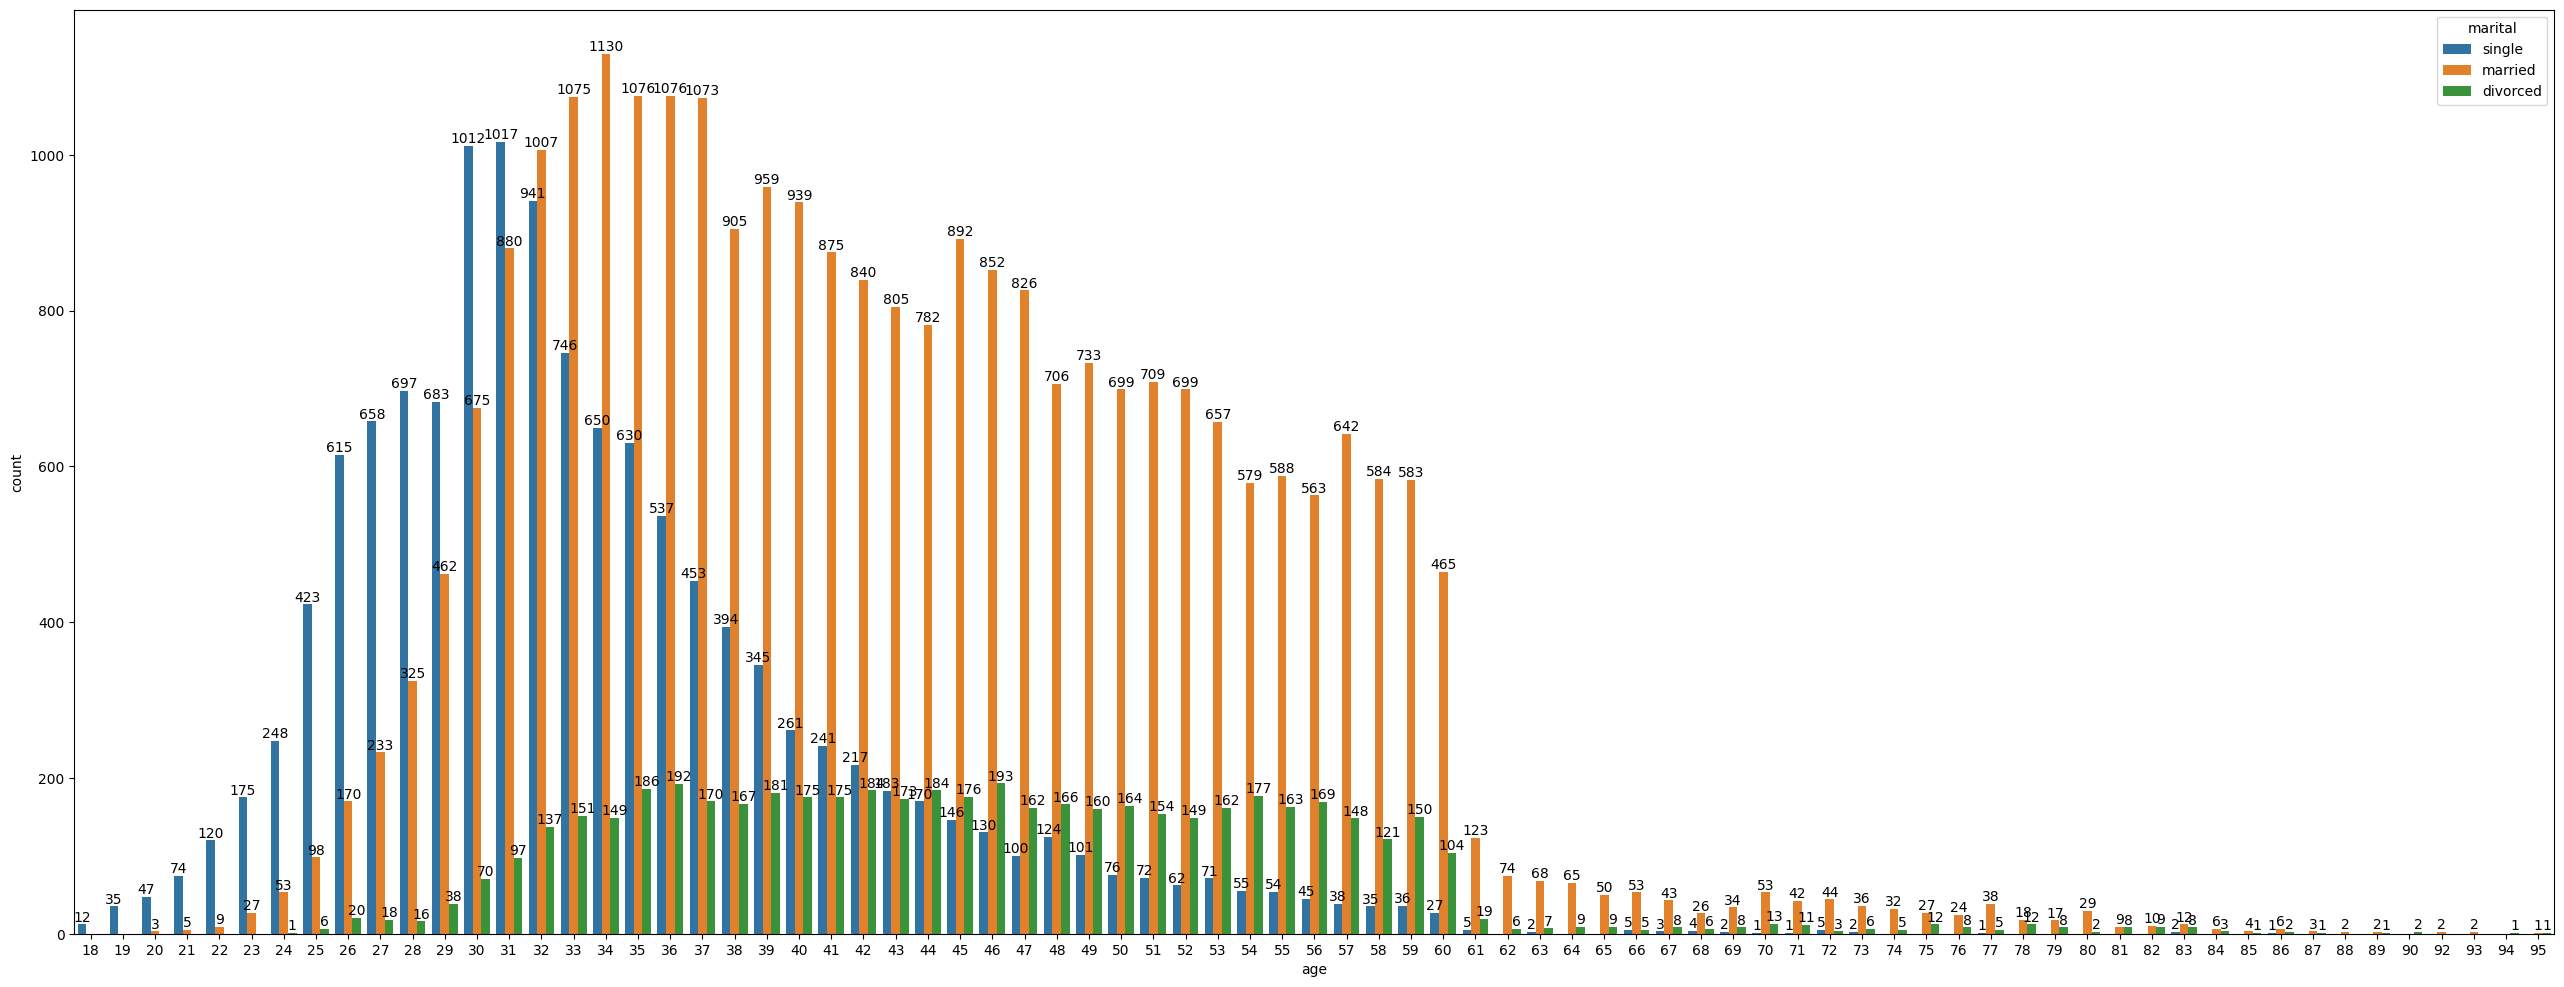

In [ ]:
# Age comparision graph of marital status
plt.figure(figsize=(32,12))
ax=sns.countplot(x='age',data=df,hue='marital')
for bar in ax.containers:
  ax.bar_label(bar)

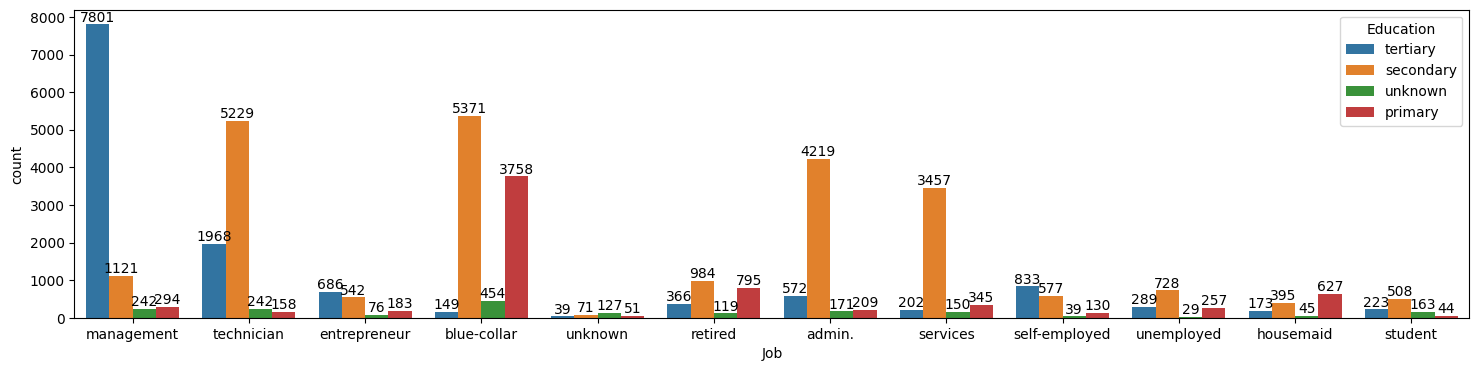

In [ ]:
plt.figure(figsize=(18,4))
ax=sns.countplot(x='Job',data=df,hue='Education')
for bar in ax.containers:
   ax.bar_label(bar)

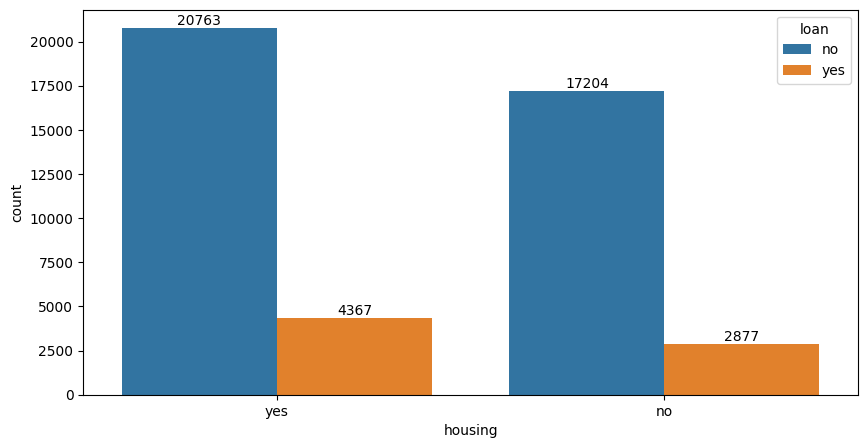

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='housing',data=df,hue='loan')
for bar in ax.containers:
    ax.bar_label(bar)

In [207]:
df.head(5)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,response,Job,Education,Month,Year
0,1,58,100000,2143,married,yes,no,yes,no,unknown,5,261 sec,1,-1,0,unknown,no,management,tertiary,may,2017
1,2,44,60000,29,single,yes,no,yes,no,unknown,5,151 sec,1,-1,0,unknown,no,technician,secondary,may,2017
2,3,33,120000,2,married,yes,no,yes,yes,unknown,5,76 sec,1,-1,0,unknown,no,entrepreneur,secondary,may,2017
3,4,47,20000,1506,married,no,no,yes,no,unknown,5,92 sec,1,-1,0,unknown,no,blue-collar,unknown,may,2017
4,5,33,0,1,single,no,no,no,no,unknown,5,198 sec,1,-1,0,unknown,no,unknown,unknown,may,2017


In [208]:
df['duration'].dtype

dtype('O')

In [209]:
df['duration'] = df['duration'].apply(lambda x:float(x.split()[0])/60 if float(x.split()[0])>0 else 0)

In [210]:
df['duration']

0        4.350000
1        2.516667
2        1.266667
3        1.533333
4        3.300000
           ...   
45206    0.271389
45207    0.126667
45208    0.313056
45209    0.141111
45210    0.100278
Name: duration, Length: 45211, dtype: float64

In [211]:
df.head(2)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,response,Job,Education,Month,Year
0,1,58,100000,2143,married,yes,no,yes,no,unknown,5,4.350000,1,-1,0,unknown,no,management,tertiary,may,2017
1,2,44,60000,29,single,yes,no,yes,no,unknown,5,2.516667,1,-1,0,unknown,no,technician,secondary,may,2017


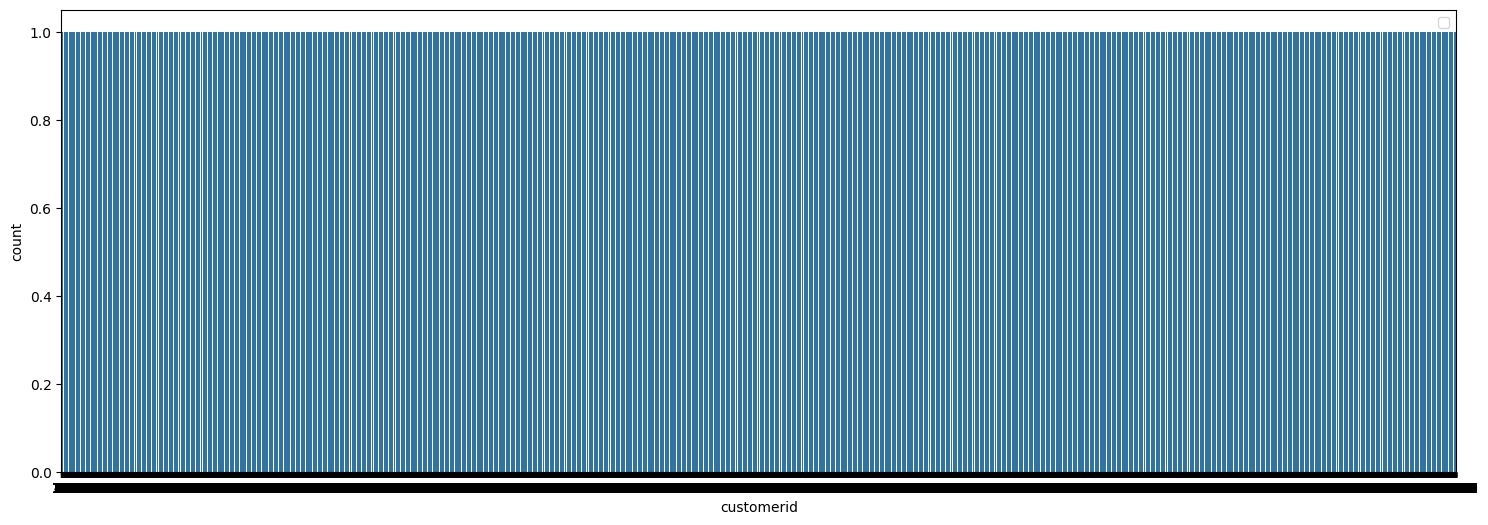

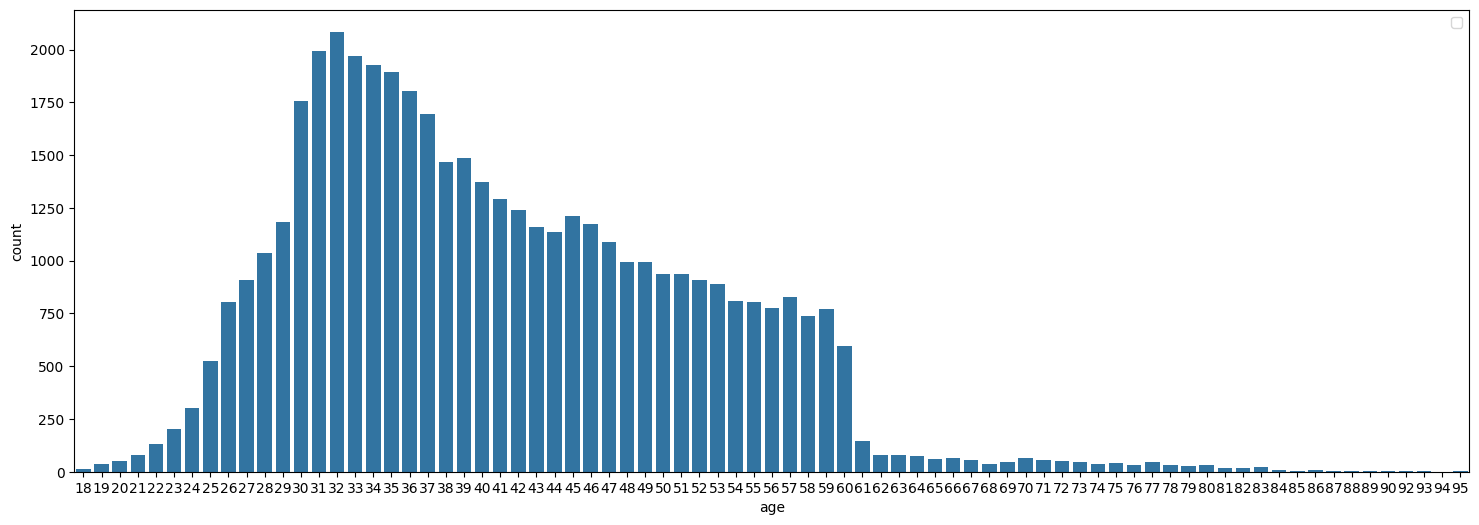

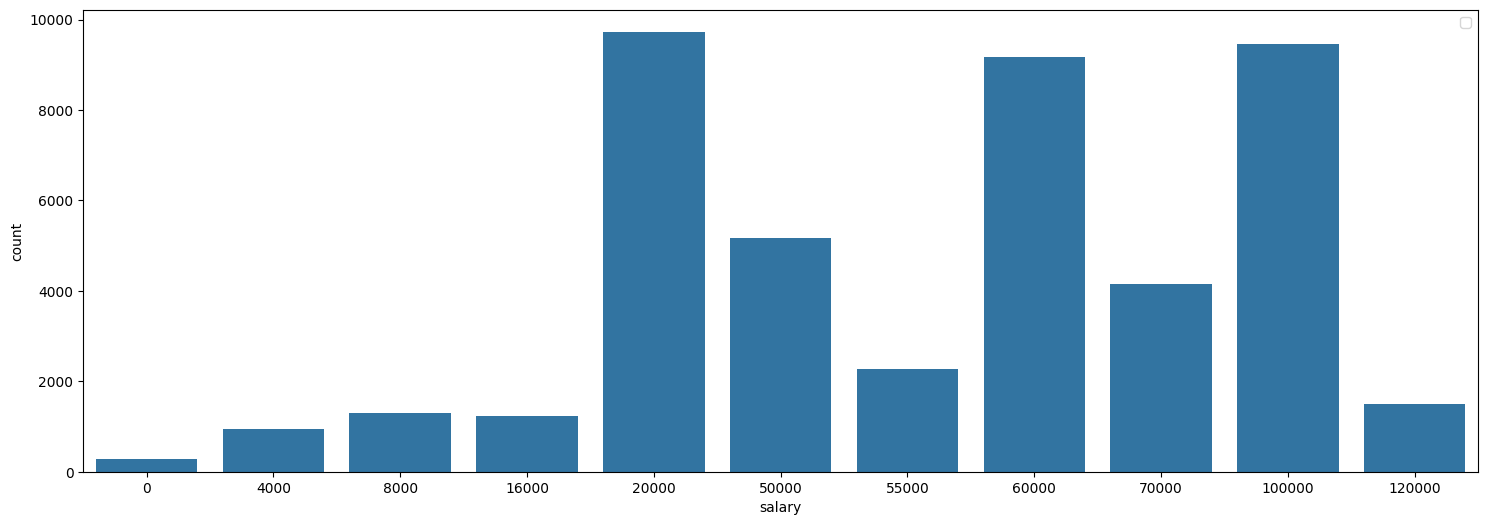

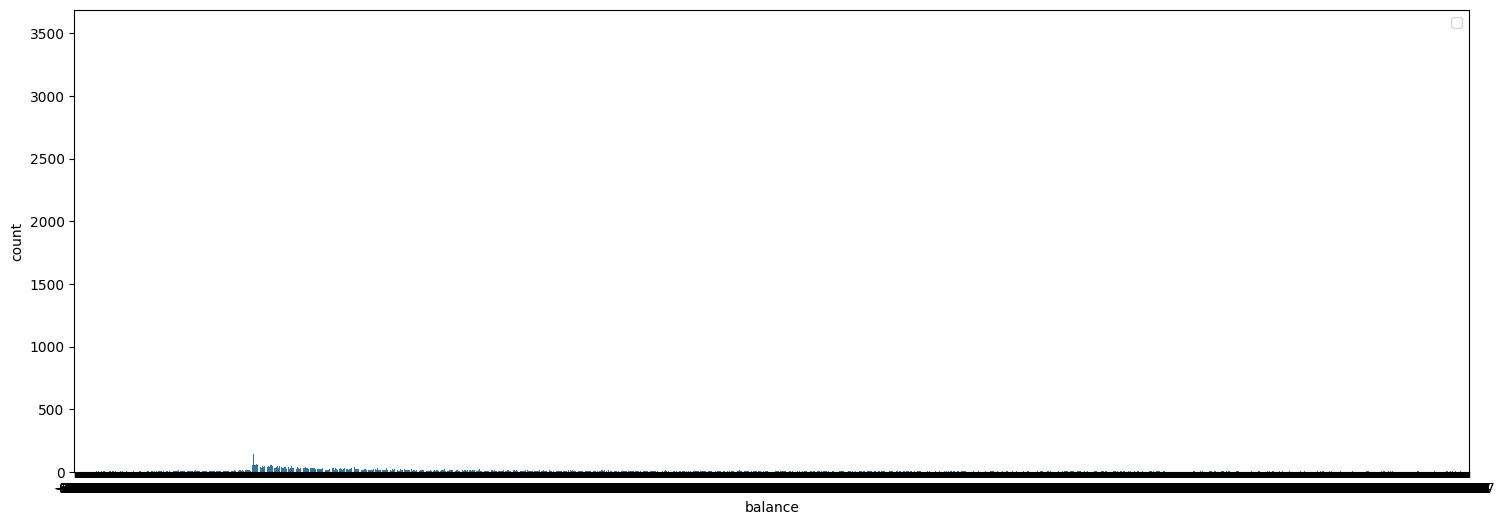

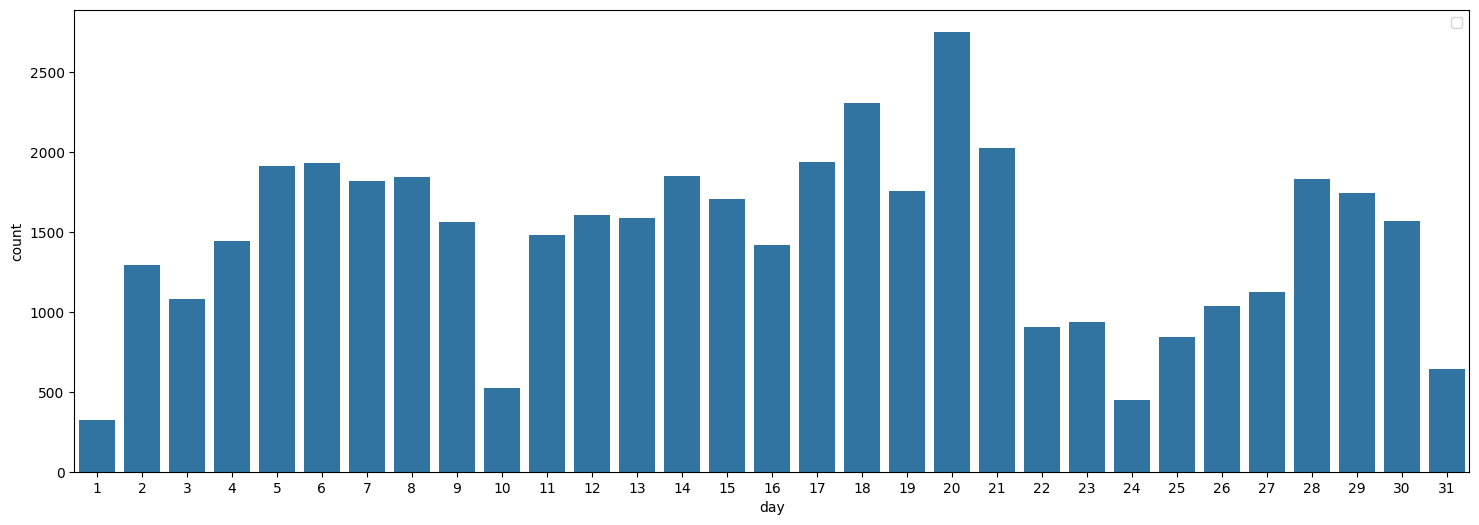

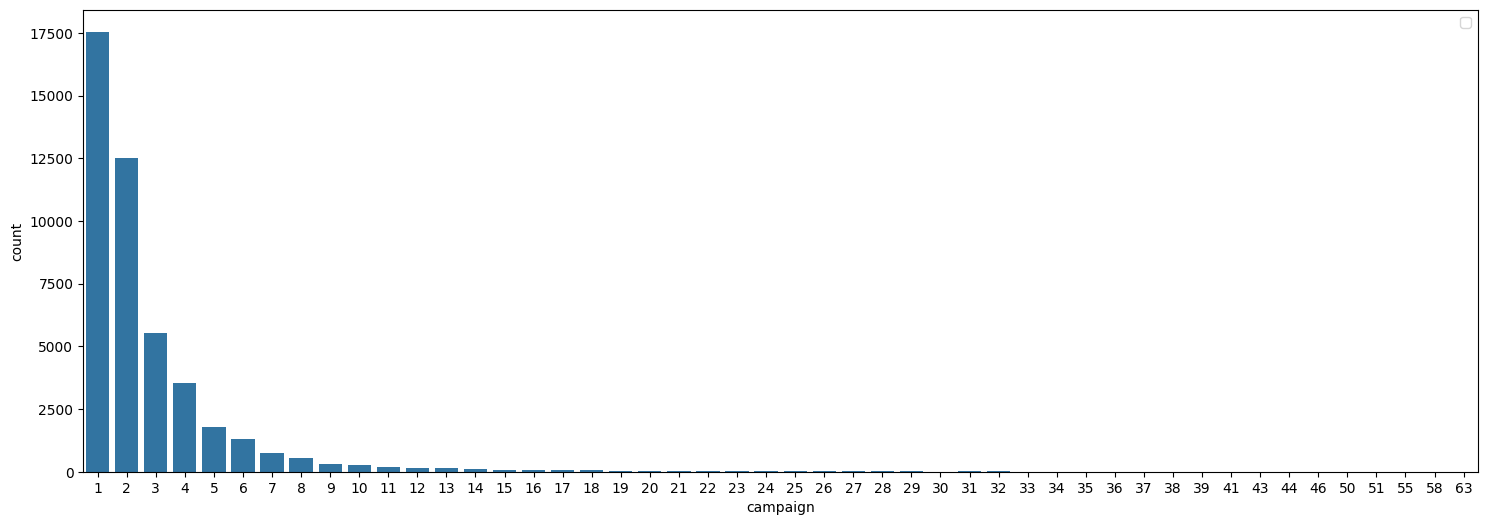

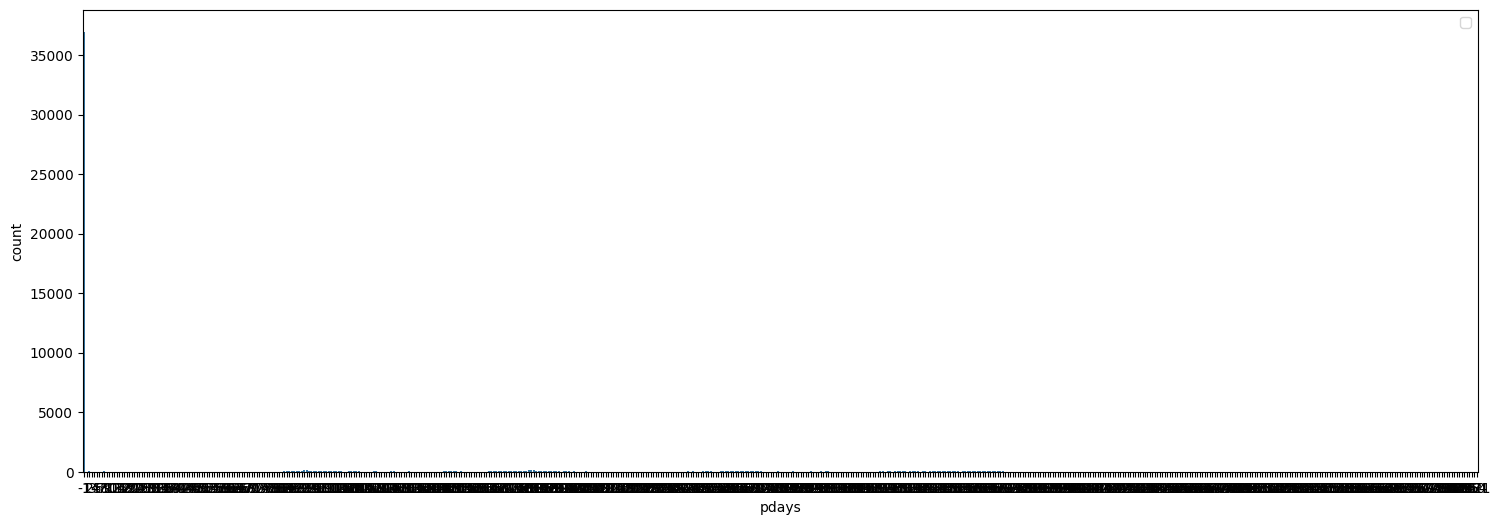

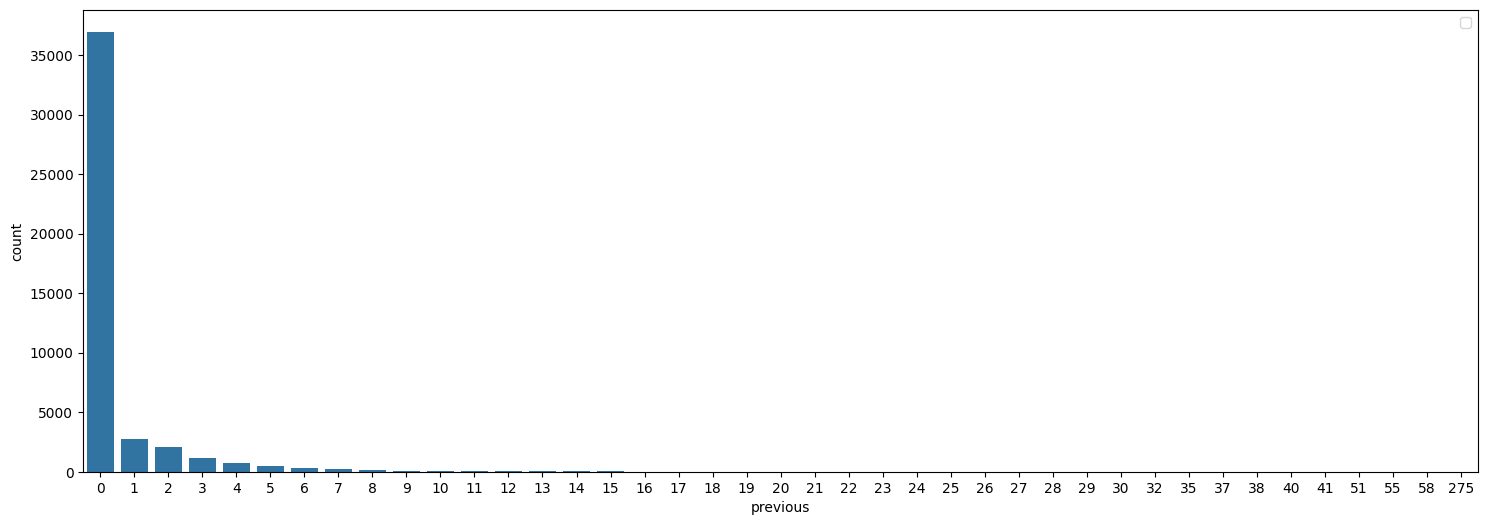

In [ ]:
id=df.select_dtypes(int)
for i in id:
  plt.figure(figsize=(18,6))
  ax=sns.countplot(data=df,x=i)
  ax.legend(loc='best')

In [212]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [213]:
# Applying LabelEncoding on column Marital and drop Marital column
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le=preprocessing.LabelEncoder()
array=np.array(['single', 'married', 'divorced'], dtype=object)
df['marital_status_encoded']=le.fit_transform(df['marital'])
df.drop(columns='marital',inplace=True)

In [214]:
df['Job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [215]:
# Applying LabelEncoding on column Job and drop Job column
le=preprocessing.LabelEncoder()
df['Job_encoded']=le.fit_transform(df['Job'])
df.drop(columns='Job',inplace=True)

In [216]:
df['Education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [217]:
# Applying LabelEncoding on column Education and drop Education column
le=preprocessing.LabelEncoder()
df['Education_encoded']=le.fit_transform(df['Education'])
df.drop(columns='Education',inplace=True)

In [218]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [219]:
# Applying LabelEncoding on column contact and drop contact column
le=preprocessing.LabelEncoder()
df['contact_encoded']=le.fit_transform(df['contact'])
df.drop(columns='contact',inplace=True)

In [220]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [221]:
# Applying LabelEncoding on column poutcome and drop poutcome column
le=preprocessing.LabelEncoder()
df['poutcome_encoded']=le.fit_transform(df['poutcome'])
df.drop(columns='poutcome',inplace=True)

In [222]:
df['targeted'].unique()

array(['yes', 'no'], dtype=object)

In [223]:
# Applying LabelEncoding on column targeted and drop targeted column
le=preprocessing.LabelEncoder()
df['targeted_encoded']=le.fit_transform(df['targeted'])
df.drop(columns='targeted',inplace=True)

In [224]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [225]:
# Applying LabelEncoding on column housing and drop housing column
le=preprocessing.LabelEncoder()
df['housing_encoded']=le.fit_transform(df['housing'])
df.drop(columns='housing',inplace=True)

In [226]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [227]:
# Applying LabelEncoding on column default and drop default column
le=preprocessing.LabelEncoder()
df['default_encoded']=le.fit_transform(df['default'])
df.drop(columns='default',inplace=True)

In [228]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [229]:
# Applying LabelEncoding on column default and drop default column
le=preprocessing.LabelEncoder()
df['loan_encoded']=le.fit_transform(df['loan'])
df.drop(columns='loan',inplace=True)

In [230]:
df['response'].unique()

array(['no', 'yes'], dtype=object)

In [231]:
# Applying LabelEncoding on column response and drop response column
le=preprocessing.LabelEncoder()
df['response_encoded']=le.fit_transform(df['response'])
df.drop(columns='response',inplace=True)

In [232]:
df['Month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [233]:
# Applying LabelEncoding on column response and drop response column
le=preprocessing.LabelEncoder()
df['Month_encoded']=le.fit_transform(df['Month'])
df.drop(columns='Month',inplace=True)

In [234]:
df.head(5)

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,Year,marital_status_encoded,Job_encoded,Education_encoded,contact_encoded,poutcome_encoded,targeted_encoded,housing_encoded,default_encoded,loan_encoded,response_encoded,Month_encoded
0,1,58,100000,2143,5,4.350000,1,-1,0,2017,1,4,2,2,3,1,1,0,0,0,8
1,2,44,60000,29,5,2.516667,1,-1,0,2017,2,9,1,2,3,1,1,0,0,0,8
2,3,33,120000,2,5,1.266667,1,-1,0,2017,1,2,1,2,3,1,1,0,1,0,8
3,4,47,20000,1506,5,1.533333,1,-1,0,2017,1,1,3,2,3,0,1,0,0,0,8
4,5,33,0,1,5,3.300000,1,-1,0,2017,2,11,3,2,3,0,0,0,0,0,8


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerid              45211 non-null  int64  
 1   age                     45211 non-null  int64  
 2   salary                  45211 non-null  int64  
 3   balance                 45211 non-null  int64  
 4   day                     45211 non-null  int64  
 5   duration                45211 non-null  float64
 6   campaign                45211 non-null  int64  
 7   pdays                   45211 non-null  int64  
 8   previous                45211 non-null  int64  
 9   Year                    45211 non-null  object 
 10  marital_status_encoded  45211 non-null  int64  
 11  Job_encoded             45211 non-null  int64  
 12  Education_encoded       45211 non-null  int64  
 13  contact_encoded         45211 non-null  int64  
 14  poutcome_encoded        45211 non-null

In [236]:
df.shape

(45211, 21)

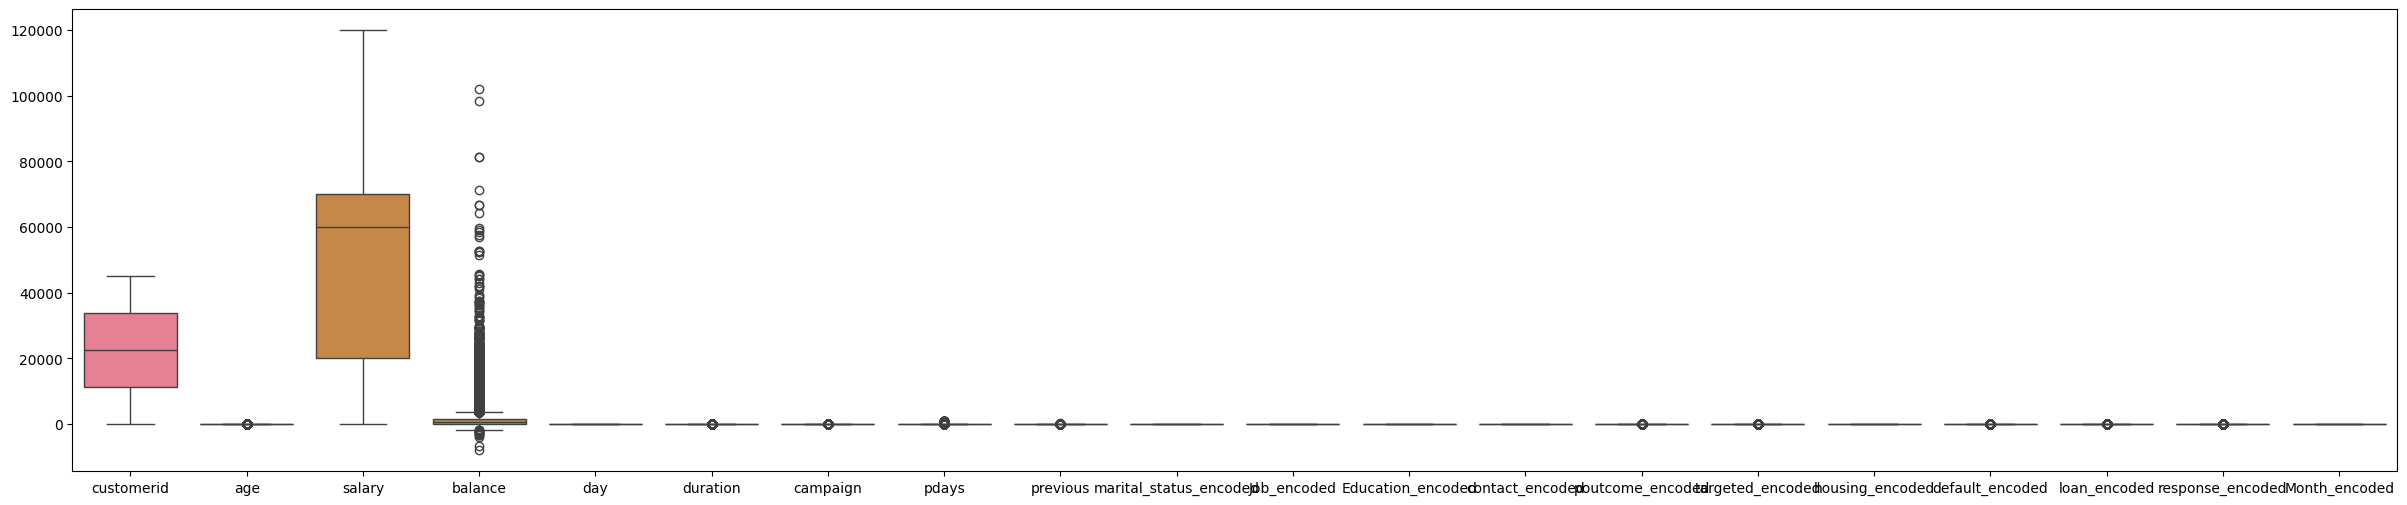

In [ ]:
# Graph representation with outliers in df
plt.figure(figsize=(30,6))
sns.boxplot(data=df)
plt.show()

In [237]:
df.shape

(45211, 21)

In [238]:
df.head(5)

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,Year,marital_status_encoded,Job_encoded,Education_encoded,contact_encoded,poutcome_encoded,targeted_encoded,housing_encoded,default_encoded,loan_encoded,response_encoded,Month_encoded
0,1,58,100000,2143,5,4.350000,1,-1,0,2017,1,4,2,2,3,1,1,0,0,0,8
1,2,44,60000,29,5,2.516667,1,-1,0,2017,2,9,1,2,3,1,1,0,0,0,8
2,3,33,120000,2,5,1.266667,1,-1,0,2017,1,2,1,2,3,1,1,0,1,0,8
3,4,47,20000,1506,5,1.533333,1,-1,0,2017,1,1,3,2,3,0,1,0,0,0,8
4,5,33,0,1,5,3.300000,1,-1,0,2017,2,11,3,2,3,0,0,0,0,0,8


In [239]:
df.isnull().sum()

customerid                0
age                       0
salary                    0
balance                   0
day                       0
duration                  0
campaign                  0
pdays                     0
previous                  0
Year                      0
marital_status_encoded    0
Job_encoded               0
Education_encoded         0
contact_encoded           0
poutcome_encoded          0
targeted_encoded          0
housing_encoded           0
default_encoded           0
loan_encoded              0
response_encoded          0
Month_encoded             0
dtype: int64

In [240]:
df1=df.select_dtypes(exclude='object')

In [241]:
for i in df1:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3 - q1
    LL = q1 - 1.5 * iqr
    UL = q3 + 1.5 * iqr

    # Remove rows with outliers in the current column
    df2 = df1[~((df1[i] < LL) | (df1[i] > UL))]

In [242]:
# Confirming df2 is without outliers
num_var = df2.select_dtypes(exclude='object')
for i in num_var.columns:
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    IQR = q3 - q1
    UL = q3 + 1.5 * IQR
    LL = q1 - 1.5 * IQR
    print('Number of Outliers in dataset df2', i, ' = ', (df2.shape[0] - df2[(df2[i] < UL) | (df2[i] > LL)].shape[0]))
    print(' ')

Number of Outliers in dataset df2 customerid  =  0
 
Number of Outliers in dataset df2 age  =  0
 
Number of Outliers in dataset df2 salary  =  0
 
Number of Outliers in dataset df2 balance  =  0
 
Number of Outliers in dataset df2 day  =  0
 
Number of Outliers in dataset df2 duration  =  0
 
Number of Outliers in dataset df2 campaign  =  0
 
Number of Outliers in dataset df2 pdays  =  36954
 
Number of Outliers in dataset df2 previous  =  36954
 
Number of Outliers in dataset df2 marital_status_encoded  =  0
 
Number of Outliers in dataset df2 Job_encoded  =  0
 
Number of Outliers in dataset df2 Education_encoded  =  0
 
Number of Outliers in dataset df2 contact_encoded  =  0
 
Number of Outliers in dataset df2 poutcome_encoded  =  36959
 
Number of Outliers in dataset df2 targeted_encoded  =  37091
 
Number of Outliers in dataset df2 housing_encoded  =  0
 
Number of Outliers in dataset df2 default_encoded  =  44396
 
Number of Outliers in dataset df2 loan_encoded  =  37967
 
Numbe

In [243]:
df2.corr()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,marital_status_encoded,Job_encoded,Education_encoded,contact_encoded,poutcome_encoded,targeted_encoded,housing_encoded,default_encoded,loan_encoded,response_encoded,Month_encoded
customerid,1.000000,0.014912,0.039966,0.073639,-0.061465,-0.513924,-0.102884,0.437729,0.271098,0.081781,0.063002,0.094658,-0.722366,-0.445365,-0.074904,-0.176143,-0.053098,-0.084240,0.296158,-0.162058
age,0.014912,1.000000,0.024367,0.097749,-0.009183,-0.034121,0.004851,-0.023780,0.001316,-0.403160,-0.021822,-0.106770,0.026273,0.007349,0.113261,-0.185490,-0.018042,-0.015675,0.025067,-0.042157
salary,0.039966,0.024367,1.000000,0.055469,0.027864,-0.061358,0.015005,-0.014968,0.014564,-0.016633,0.141655,0.425256,-0.108612,-0.005864,-0.222868,-0.048965,0.006860,0.017749,0.020024,-0.050685
balance,0.073639,0.097749,0.055469,1.000000,0.004503,-0.023586,-0.014578,0.003435,0.016674,0.002122,0.018232,0.064514,-0.027273,-0.020967,-0.040699,-0.068768,-0.066745,-0.084350,0.052895,0.019718
day,-0.061465,-0.009183,0.027864,0.004503,1.000000,-0.065567,0.162490,-0.093044,-0.051710,-0.005261,0.022856,0.022671,-0.027936,0.083460,-0.012891,-0.027982,0.009424,0.011370,-0.028265,-0.006098
duration,-0.513924,-0.034121,-0.061358,-0.023586,-0.065567,1.000000,-0.034613,-0.176035,-0.107739,-0.016365,-0.058585,-0.060625,0.549735,0.190559,0.031809,0.130976,0.014365,0.030247,0.036886,0.216039
campaign,-0.102884,0.004851,0.015005,-0.014578,0.162490,-0.034613,1.000000,-0.088628,-0.032855,-0.008994,0.006839,0.006255,0.019614,0.101588,-0.002597,-0.023599,0.016822,0.009980,-0.073172,-0.109503
pdays,0.437729,-0.023780,-0.014968,0.003435,-0.093044,-0.176035,-0.088628,1.000000,0.454820,0.019172,-0.024455,0.000052,-0.244816,-0.858362,-0.004350,0.124178,-0.029979,-0.022754,0.103695,0.033050
previous,0.271098,0.001316,0.014564,0.016674,-0.051710,-0.107739,-0.032855,0.454820,1.000000,0.014973,-0.000911,0.017570,-0.147811,-0.489752,-0.013253,0.037076,-0.018329,-0.011043,0.093286,0.022605
marital_status_encoded,0.081781,-0.403160,-0.016633,0.002122,-0.005261,-0.016365,-0.008994,0.019172,0.014973,1.000000,0.062045,0.108576,-0.039201,-0.016850,-0.219610,-0.016096,-0.007023,-0.046893,0.045520,-0.006878


In [244]:
df2.describe()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,marital_status_encoded,Job_encoded,Education_encoded,contact_encoded,poutcome_encoded,targeted_encoded,housing_encoded,default_encoded,loan_encoded,response_encoded,Month_encoded
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.935237,57006.171065,1362.272058,15.806419,1.387921,2.763841,40.197828,0.580323,1.167725,4.339762,1.224813,0.640242,2.559974,0.820398,0.555838,0.018027,0.160226,0.116941,5.525204
std,13051.435847,10.616867,32085.718415,3044.765829,8.322476,3.077092,3.098021,100.128746,2.303441,0.608230,3.272657,0.747997,0.897951,0.989059,0.383860,0.496878,0.133049,0.366820,0.321353,3.006452
min,1.000000,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11303.500000,33.000000,20000.000000,72.000000,8.000000,0.037222,1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,22606.000000,39.000000,60000.000000,448.000000,16.000000,0.083333,2.000000,-1.000000,0.000000,1.000000,4.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.000000
75%,33908.500000,48.000000,70000.000000,1428.000000,21.000000,1.516667,3.000000,-1.000000,0.000000,2.000000,7.000000,2.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000
max,45211.000000,95.000000,120000.000000,102127.000000,31.000000,64.683333,63.000000,871.000000,275.000000,2.000000,11.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000


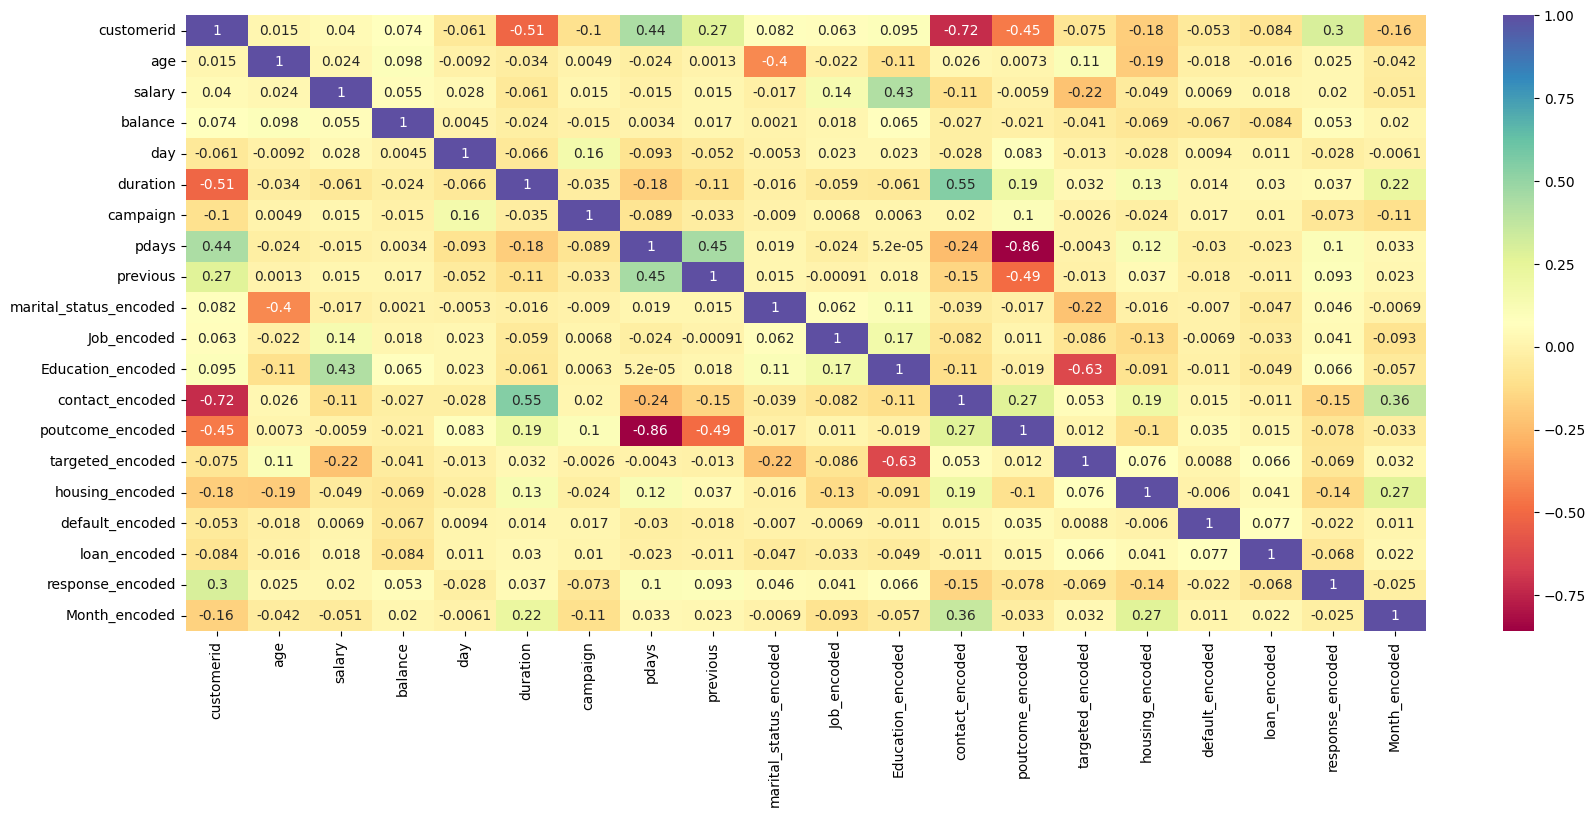

In [245]:
plt.figure(figsize=(20,8))
sns.heatmap(df2.corr(),annot=True,cmap="Spectral")
plt.show()

In [ ]:
# Training the model

In [246]:
df2['response_encoded'].value_counts()

0    39924
1     5287
Name: response_encoded, dtype: int64

In [247]:
df2['response_encoded'].shape[0]

45211

In [248]:
print((df2['response_encoded'].value_counts()/df2['response_encoded'].shape[0])*100)

0    88.305943
1    11.694057
Name: response_encoded, dtype: float64


0    88.305943
1    11.694057
Name: response_encoded, dtype: float64


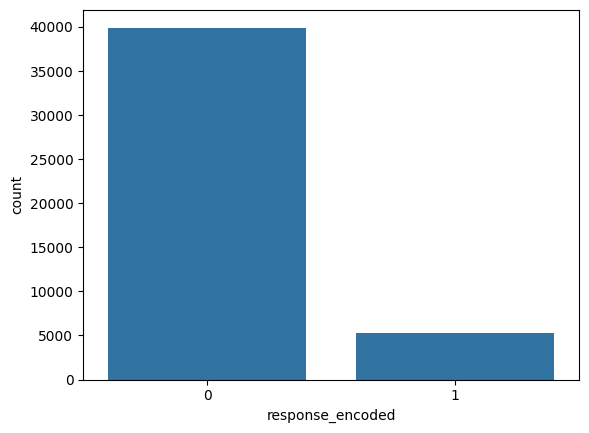

In [249]:
print((df2['response_encoded'].value_counts()/df2['response_encoded'].shape[0])*100)
sns.countplot(data=df2,x=df2['response_encoded'])
plt.show()

In [250]:
X=df2.drop('response_encoded',axis=1)

In [251]:
Y=df2['response_encoded']

In [252]:
independent_variable=X

In [253]:
dependent_variable=Y

In [254]:
independent_variable.head()

,customerid,age,salary,balance,day,duration,campaign,pdays,previous,marital_status_encoded,Job_encoded,Education_encoded,contact_encoded,poutcome_encoded,targeted_encoded,housing_encoded,default_encoded,loan_encoded,Month_encoded
0,1,58,100000,2143,5,4.350000,1,-1,0,1,4,2,2,3,1,1,0,0,8
1,2,44,60000,29,5,2.516667,1,-1,0,2,9,1,2,3,1,1,0,0,8
2,3,33,120000,2,5,1.266667,1,-1,0,1,2,1,2,3,1,1,0,1,8
3,4,47,20000,1506,5,1.533333,1,-1,0,1,1,3,2,3,0,1,0,0,8
4,5,33,0,1,5,3.300000,1,-1,0,2,11,3,2,3,0,0,0,0,8


In [255]:
dependent_variable.head()

0    0
1    0
2    0
3    0
4    0
Name: response_encoded, dtype: int64

In [256]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [257]:
X_train.shape

(36168, 19)

In [258]:
X_test.shape

(9043, 19)

In [ ]:
Y_train.shape

(36168,)

In [ ]:
Y_test.shape

(9043,)

In [259]:
print("Before Oversampling the shape of train_X:", X_train.shape)
print("Before Oversampling the shape of train_Y:", Y_train.shape)

Before Oversampling the shape of train_X: (36168, 19)
Before Oversampling the shape of train_Y: (36168,)


In [260]:
print("Before Oversampling the shape of train_X:",X_test.shape)
print("Before Oversamplllng the shape of train_Y:",Y_test.shape)

Before Oversampling the shape of train_X: (9043, 19)
Before Oversamplllng the shape of train_Y: (9043,)


In [261]:
# Balancing the dataset
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [262]:
smote=SMOTE(sampling_strategy='minority')
X_train_sm,Y_train_sm=smote.fit_resample(X_train,Y_train)

In [263]:
print("After Oversampling the shape of train_X:", X_train_sm.shape)
print("After Oversampling the shape of train_Y:", Y_train_sm.shape)

After Oversampling the shape of train_X: (63888, 19)
After Oversampling the shape of train_Y: (63888,)


In [264]:
print("After Oversampling the shape of train_X:", X_test.shape)
print("After Oversampling the shape of train_Y:", Y_test.shape)

After Oversampling the shape of train_X: (9043, 19)
After Oversampling the shape of train_Y: (9043,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
# Improving model accuracy through SVM Classifier
from sklearn.svm import SVC
SVM_classifier=SVC(kernel='linear',random_state=42)
SVM_classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
Y_pred=SVM_classifier.predict(X_test)

In [ ]:
Y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: response_encoded, Length: 9043, dtype: int64

In [ ]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy of SVM(Support Vector Machine) Model
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(Y_test,Y_pred)*100
print("The accuracy of SVM(Support Vector Machine) Model is",accuracy_score)

The accuracy of SVM(Support Vector Machine) Model is 88.2450514209886


In [ ]:
# Improving model accuracy through LogisticRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

logistic=LogisticRegression(random_state=42)
logistic.fit(X_train,Y_train)
Y_pred=logistic.predict(X_test)
confusion1_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion1_matrix)
accuracy1_score = accuracy_score(Y_test,Y_pred)*100
print("The accuracy of the LogisticRegression model is {}%".format(accuracy1_score))

[[7909   71]
 [ 953  110]]
The accuracy of the LogisticRegression model is 88.67632422868516%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import sklearn
from sklearn import metrics
print(sklearn.metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7980
           1       0.61      0.10      0.18      1063

    accuracy                           0.89      9043
   macro avg       0.75      0.55      0.56      9043
weighted avg       0.86      0.89      0.85      9043



In [ ]:
# ROC CURVE
from sklearn import metrics
fpr,tpr, thresholds = metrics.roc_curve(Y_test,Y_pred)

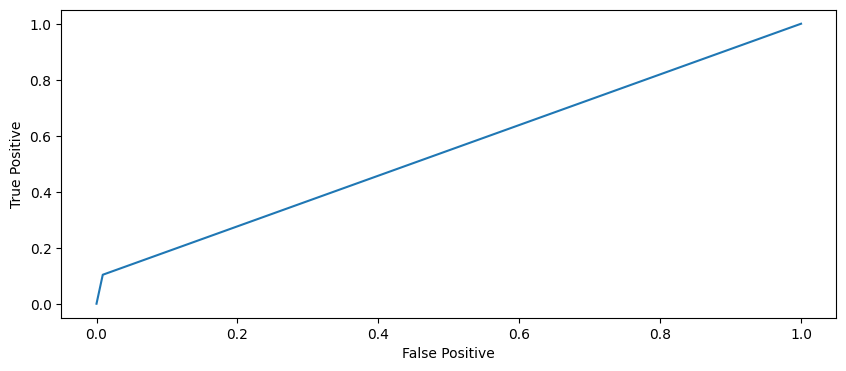

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(fpr,tpr)
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.show()

In [ ]:
# Increasing model accuracy by Ensemble Technique Voting Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
model1=LogisticRegression()
model2=SVC()
model3=DecisionTreeClassifier()

In [ ]:
ensemble = VotingClassifier(estimators=[('logistic', model1), ('Svm', model2), ('decision tree', model3)], voting='hard')

In [ ]:
Voting_technique=ensemble.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Y_pred=Voting_technique.predict(X_test)

In [ ]:
Y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: response_encoded, Length: 9043, dtype: int64

In [ ]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy of  Ensemble Technique Voting Classifier
from sklearn.metrics import accuracy_score
accuracy_Voting_classifier=accuracy_score(Y_test,Y_pred)*100
print("The accuracy by  Voting Classifier model is",accuracy_Voting_classifier)

The accuracy by  Voting Classifier model is 89.24029636182684


In [ ]:
# Increasing model accuracy by Decision Tree
from sklearn.tree import DecisionTreeClassifier
Tree_model=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,random_state=0)
Tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [ ]:
Y_pred_=Tree_model.predict(X_test)

In [ ]:
Y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: response_encoded, Length: 9043, dtype: int64

In [ ]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy score of Decision Tree model
acc1_score=accuracy_score(Y_test,Y_pred)*100

In [ ]:
acc1_score

89.24029636182684

In [ ]:
print("The accuracy of Decision Tree model is",acc1_score)

The accuracy of Decision Tree model is 89.24029636182684


In [265]:
# Creating  Visual Decision Tree for this model
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

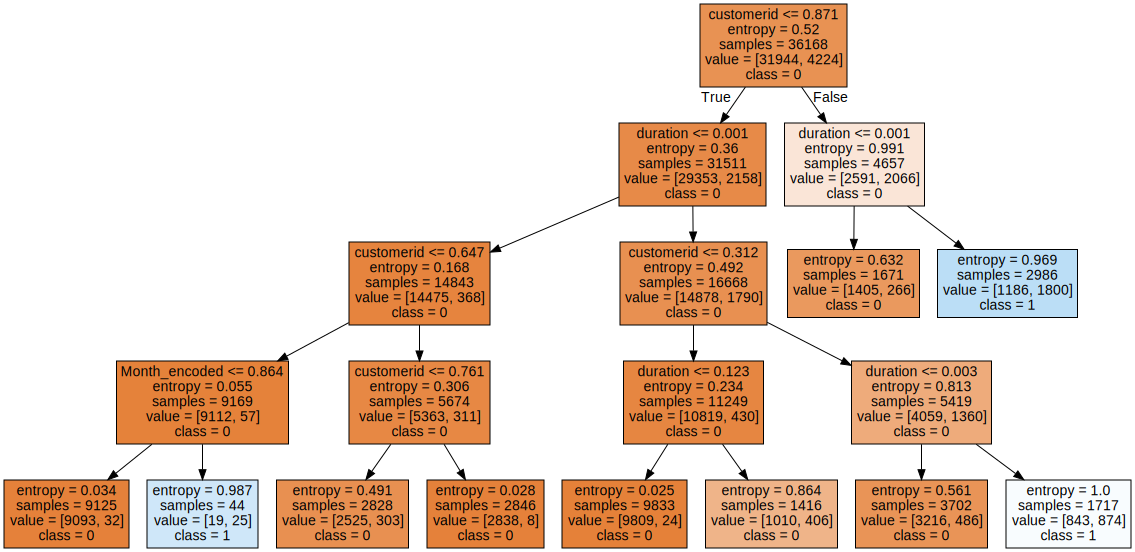

In [266]:
graph=Source(tree.export_graphviz(Tree_model,out_file=None,
                                  feature_names=X_train.columns,class_names=['0','1']
                                  ,filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
# Improving model accuracy through Ensemble Technique by Random Forest Classifier(Bagging)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
random_tree_classifier=RandomForestClassifier()
grid_values={'n_estimators':[50,70,100],'max_depth':[3,5,7]}
random_tree_classifier=GridSearchCV(random_tree_classifier,param_grid=grid_values,scoring='roc_auc',cv=5)
random_tree_classifier.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 70, 100]},
             scoring='roc_auc')

In [ ]:
Y_pred=random_tree_classifier.predict(X_train)

In [ ]:
Y_train

13932    1
9894     0
39946    0
9217     0
4124     0
        ..
30403    0
21243    0
42613    1
43567    0
2732     0
Name: response_encoded, Length: 36168, dtype: int64

In [ ]:
Y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
Y_pred_test=random_tree_classifier.predict(X_test)

In [ ]:
Y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: response_encoded, Length: 9043, dtype: int64

In [ ]:
Y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Accuracy score of Ensemble technique RandomForest(Bagging)
acc1_score=accuracy_score(Y_train,Y_pred)*100
acc2_score=accuracy_score(Y_test,Y_pred_test)*100

In [ ]:
acc1_score

91.04733466047334

In [ ]:
acc2_score

89.9922592060157

In [ ]:
print("The accuracy of RandomForest model is",acc1_score)
print("The accuracy of RandomForest model is",acc2_score)

The accuracy of RandomForest model is 91.04733466047334
The accuracy of RandomForest model is 89.9922592060157


In [ ]:
# when dataset is heavily imabalnce used roc_auc_score
# calculate roc_auc_score on train set
roc_auc_score(Y_train,Y_pred)*100

65.54390104557977

In [ ]:
# calculate roc_auc_score on test set
roc_auc_score(Y_test,Y_pred_test)*100

63.22128227435947

In [ ]:
# obtain confusion matrix in train set
confusion_matrix(Y_train,Y_pred)

array([[31567,   377],
       [ 2861,  1363]])

In [ ]:
# obtain confusion matrix in test set
confusion_matrix(Y_test,Y_pred_test)

array([[7838,  142],
       [ 763,  300]])

In [ ]:
# Improving model accuracy through Ensemble Technique by ADAboost  Classifier(Boosting)
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=100,learning_rate=1)
Adaboost_model=model.fit(X_train,Y_train)

In [ ]:
Y_pred=Adaboost_model.predict(X_test)

In [ ]:
Y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: response_encoded, Length: 9043, dtype: int64

In [ ]:
Y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Accuracy of Ensemble Technique by ADAboost  Classifier(Boosting)
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(Y_test,Y_pred)*100
print("The accuracy of Ensemble Technique by ADAboost  Classifier(Boosting) is",accuracy_score)

The accuracy of Ensemble Technique by ADAboost  Classifier(Boosting) is 90.42353201371226


In [ ]:
# Improving model accuracy through Ensemble Technique by Gradient Boosting Classifier(Boosting)
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100,learning_rate=1)
Gradient_model=model.fit(X_train,Y_train)

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
Y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: response_encoded, Length: 9043, dtype: int64

In [ ]:
# Accuracy of Ensemble Technique by GradientBoosting Classifier(Boosting)
from sklearn.metrics import accuracy_score
accuracy5_score=accuracy_score(Y_test,Y_pred)*100
print("The accuracy of Ensemble Technique by GradientBoosting Classifier(Boosting) is",accuracy5_score)

The accuracy of Ensemble Technique by GradientBoosting Classifier(Boosting) is 90.51199823067566


In [ ]:
# Improving model accuracy through Ensemble Technique by XGBoosting Classifier(Boosting)
import xgboost as xgb
xg_boost_model=xgb.XGBClassifier()
xg_boost_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_pred=xg_boost_model.predict(X_test)

In [ ]:
Y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
Y_test[:5]

14001    0
32046    1
13318    0
42991    0
14237    0
Name: response_encoded, dtype: int64

In [ ]:
# Accuracy of Ensemble Technique by XGBoosting Classifier(Boosting)
from sklearn.metrics import accuracy_score
accuracy6_score=accuracy_score(Y_test,Y_pred)*100
print("The accuracy of Ensemble Technique by XGBoosting Classifier(Boosting) is",accuracy6_score)

The accuracy of Ensemble Technique by XGBoosting Classifier(Boosting) is 90.48988167643482


In [ ]:
# Accuracy of  model by Linear Regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-0.3004073172061743

In [ ]:
regressor.coef_

array([ 5.04587421e-01,  2.77600023e-02,  2.36667841e-03,  1.85940394e-01,
        1.51179347e-02,  1.66084569e+00, -1.88130014e-01,  1.77637868e-01,
        1.38386671e+00,  9.33651280e-03,  1.66813832e-02,  1.77243923e-02,
        3.23718647e-02,  1.31770100e-01, -2.21704393e-02, -5.76943778e-02,
       -1.20832856e-03, -2.58477585e-02,  5.88311425e-03])

In [ ]:
Y_pred_train=regressor.predict(X_train)

In [ ]:
Y_train

13932    1
9894     0
39946    0
9217     0
4124     0
        ..
30403    0
21243    0
42613    1
43567    0
2732     0
Name: response_encoded, Length: 36168, dtype: int64

In [ ]:
Y_pred_train

array([ 0.3173294 ,  0.07069121,  0.13589732, ...,  0.33553444,
        0.26968207, -0.06000741])

In [ ]:
Y_pred_test=regressor.predict(X_test)

In [ ]:
Y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: response_encoded, Length: 9043, dtype: int64

In [ ]:
Y_pred_test

array([-0.04128786,  0.17020651,  0.07611259, ...,  0.04889476,
        0.34256809,  0.05462341])

In [ ]:
# Accuracy score of Linear Regression model
from sklearn.metrics import r2_score
r2_score(Y_train,Y_pred_train)*100

15.707169149797961

In [ ]:
r2_score(Y_test,Y_pred_test)*100

15.794470204481403

In [ ]:
# Improving accuracy of Linear model by Ridge
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
ridge_regressor.best_params_

{'alpha': 1}

In [ ]:
ridge_regressor.best_score_

-0.08711771469528624

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_train,Y_pred_train)*100

15.707169149797961

In [ ]:
r2_score(Y_test,Y_pred_test)*100

15.794470204481403

In [ ]:
# Improving accuracy of Linear model by Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso_regressor.best_params_

{'alpha': 1e-05}

In [ ]:
lasso_regressor.best_score_

-0.08719843827972129

In [ ]:
r2_score(Y_train,Y_pred_train)*100

15.707169149797961

In [ ]:
r2_score(Y_test,Y_pred_test)*100

15.794470204481403